In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Load Digits 
# ~1800 image data of hand written digits
# every image is of 64 pixel with 8 pixel height and 8 pixel width
# every pixel value is ranging from 0 - 15
# 10 classes are there 0 to 9 and each class has ~180 images

In [5]:
digit = load_digits()

In [6]:
digit.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
digit.data.shape

(1797, 64)

In [8]:
digit.target

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
digit.target.shape

(1797,)

In [13]:
df = pd.DataFrame(digit.data, columns=digit.feature_names)
df["target"] = digit.target

In [14]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [15]:
df.iloc[45]

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     9.0
pixel_0_3    16.0
pixel_0_4    13.0
             ... 
pixel_7_4    12.0
pixel_7_5     8.0
pixel_7_6     0.0
pixel_7_7     0.0
target        3.0
Name: 45, Length: 65, dtype: float64

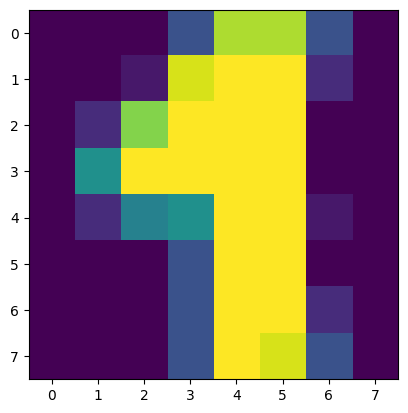

In [21]:
plt.imshow(digit.data[493].reshape(8,8))

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
X = digit.data
y = digit.target

In [25]:
scaled_X = scaler.fit_transform(X)

In [26]:
scaled_X

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [27]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [28]:
X_tr, X_te, y_tr, y_te = train_test_split(scaled_X, y, test_size=0.25, random_state=34)

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
model = DecisionTreeClassifier()

In [31]:
model.fit(X_tr, y_tr)

DecisionTreeClassifier()

In [32]:
model.score(X_tr, y_tr)

1.0

In [34]:
y_pred = model.predict(X_te)

In [35]:
accuracy_score(y_te, y_pred)

0.8355555555555556

In [37]:
import sklearn.tree as tree

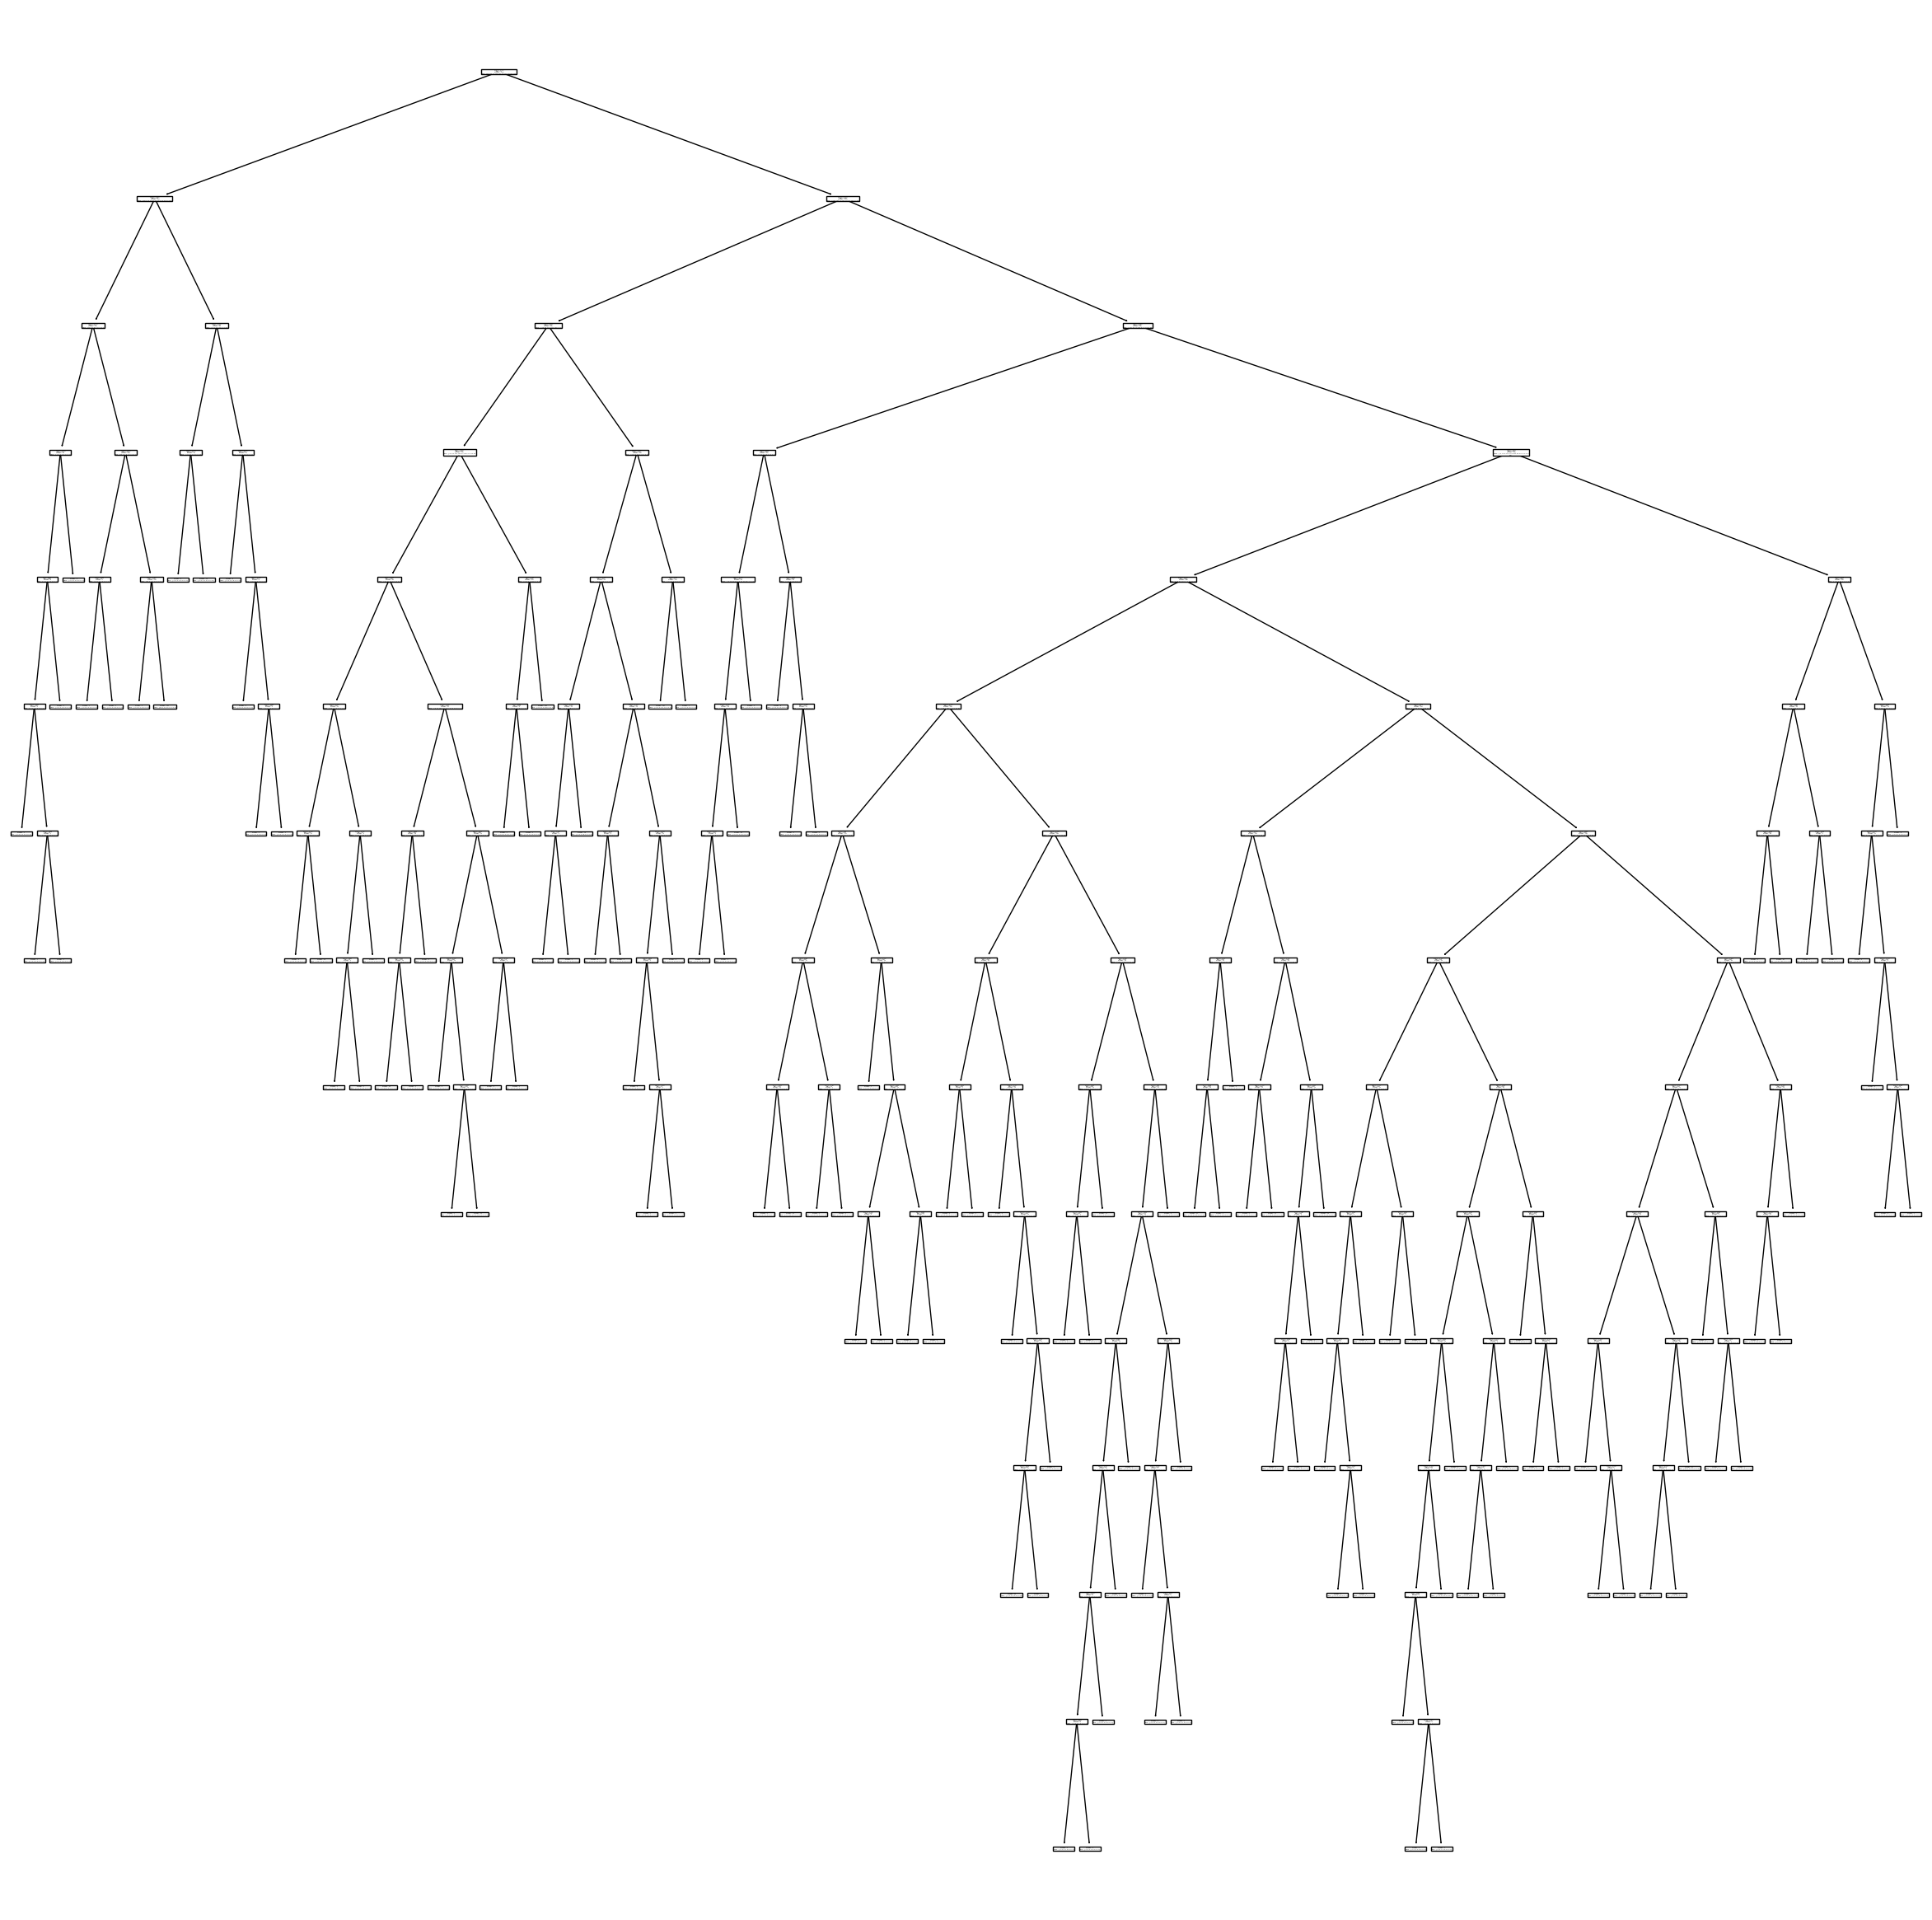

In [40]:
plt.figure(figsize=(30,30))
tree.plot_tree(model)
plt.show()

In [41]:
# DecisionTreeClassifier(
#     *,
#     criterion='gini',
#     splitter='best',
#     max_depth=None,
#     min_samples_split=2,
#     min_samples_leaf=1,
#     min_weight_fraction_leaf=0.0,
#     max_features=None,
#     random_state=None,
#     max_leaf_nodes=None,
#     min_impurity_decrease=0.0,
#     class_weight=None,
#     ccp_alpha=0.0,
#     monotonic_cst=None,
# )

In [58]:
params = {
    "criterion":["gini", "entropy"],
    "max_depth":[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "max_features":list(range(1, 45)),
    "min_samples_split":[1,2,3,4,5]
}
dtc = DecisionTreeClassifier()

In [59]:
gscv = GridSearchCV(
    estimator=dtc,
    param_grid=params,
    cv=10,
    n_jobs=-1,
    verbose=1      
)

In [60]:
gscv.fit(X_tr, y_tr)

Fitting 10 folds for each of 6600 candidates, totalling 66000 fits


C:\Users\Soft\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
13200 fits failed out of a total of 66000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Soft\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Soft\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1344, in wrapper
    estimator._validate_params()
  File "C:\Users\Soft\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ba

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             verbose=1)

In [61]:
gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 44,
 'min_samples_split': 2}

In [62]:
gscv.best_score_

0.8804698728579325

In [63]:
new_model = DecisionTreeClassifier(criterion="entropy", 
                                   max_depth=12, max_features=44,
                                  min_samples_split=2)

In [64]:
new_model.fit(X_tr, y_tr)

DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features=44)

In [65]:
new_model.score(X_tr, y_tr)

1.0

In [66]:
new_y_pred = new_model.predict(X_te)

In [67]:
accuracy_score(y_te, new_y_pred)

0.8177777777777778